### Setup

In [ ]:
%cd ~

In [ ]:
# ~/.cache/huggingface

In [1]:
from diffusers import StableDiffusionPipeline
import torch
import random
from PIL import Image

import os
import math

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def image_grid(imgs, rows, cols, size=None):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))

    if size:
        return grid.resize((cols * size, rows * size))
    else:   
        return grid



# define function to get size of directory in bytes
def get_dir_size(path):
    total_size = os.path.getsize(path)
    if os.path.isdir(path):
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            if os.path.isfile(item_path):
                total_size += os.path.getsize(item_path)
            elif os.path.isdir(item_path):
                total_size += get_dir_size(item_path)
    return total_size

### Runwayml - Stable diffusion 1.5

In [ ]:
%cd ~

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
print(f"Scheduler: {pipe.scheduler.config['_class_name']}")

model_path = "./.cache/huggingface/hub/models--" + model_id.replace("/", "--")

# get size of directory in bytes
dir_size = get_dir_size(model_path)

# convert to GB
dir_size_gb = dir_size / (1024**3)

print(f"Directory size: {math.ceil(dir_size_gb)} GB")

In [12]:
def init_pipeline():
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to(device)

    return pipe

In [17]:
def generate_image(prompt, seed=None):
    pipe = init_pipeline()
    generator = torch.Generator(device).manual_seed(seed if seed is not None else random.randint(0, 1e6))
    
    images = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images

    return images

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

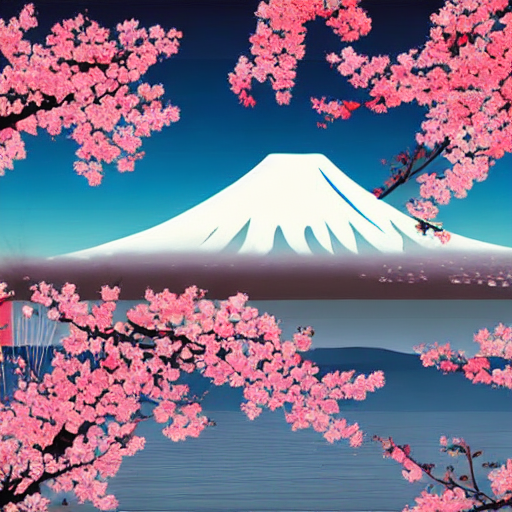

In [20]:
image = generate_image("Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration")[0]
image.show()

In [3]:
%%time

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

seed = random.randint(0, 1e6)
generator = torch.Generator(device).manual_seed(seed)
prompt = "Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration"
images = pipe(
    prompt,
    num_inference_steps=20,
    guidance_scale=7.5,
    num_images_per_prompt=1,
    generator=generator
).images

print(seed)
# image_grid(images, 1, 4, 512)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

328703
CPU times: user 3.42 s, sys: 1.1 s, total: 4.52 s
Wall time: 3.35 s


In [4]:
images

[<PIL.Image.Image image mode=RGB size=512x512>]

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "A cute adorable baby owl made of crystal ball with low poly eye's highly detailed intricated concept art trending artstation 8k"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "pixel art san francisco fisherman's wharf. 3d pixel art 4k wallpaper. incredible pixel art details. flowers. pixel art. friend playing in foreground. stunning pixel art by Pixel Jeff"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

### Stability AI - Stable Diffusion 2.1

In [ ]:
import diffusers
from diffusers import StableDiffusionPipeline, PNDMScheduler, EulerDiscreteScheduler, DDIMScheduler
import torch

schedulers = {
    "pndm": PNDMScheduler,
    "euler": EulerDiscreteScheduler,
    "ddim": DDIMScheduler
}
    

model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = schedulers["pndm"].from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to(device)
print(f"Scheduler: {pipe.scheduler.config['_class_name']}")

model_path = "./.cache/huggingface/hub/models--" + model_id.replace("/", "--")

# get size of directory in bytes

dir_size = get_dir_size(model_path)

# convert to GB
dir_size_gb = dir_size / (1024**3)

print(f"Directory size {math.ceil(dir_size_gb)} GB")

In [ ]:
%%time

seed = random.randint(0, 1e6)
generator = torch.Generator(device).manual_seed(seed)
prompt = "Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration"

images = pipe(
    prompt,
    num_inference_steps=20,
    guidance_scale=7.5,
    num_images_per_prompt=4,
    generator=generator
).images
    
print(seed)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "A cute adorable baby owl made of crystal ball with low poly eye's highly detailed intricated concept art trending artstation 8k"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "pixel art san francisco fisherman's wharf. 3d pixel art 4k wallpaper. incredible pixel art details. flowers. pixel art. friend playing in foreground. stunning pixel art by Pixel Jeff"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

### Prompthero - Openjourney

In [ ]:
import diffusers
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "prompthero/openjourney"
scheduler = schedulers["pndm"].from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to(device)
print(f"Scheduler: {pipe.scheduler.config['_class_name']}")

model_path = "./.cache/huggingface/hub/models--" + model_id.replace("/", "--")

# get size of directory in bytes
dir_size = get_dir_size(model_path)

# convert to GB
dir_size_gb = dir_size / (1024**3)

print(f"Directory size {math.ceil(dir_size_gb)} GB")

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "A cute adorable baby owl made of crystal ball with low poly eye's highly detailed intricated concept art trending artstation 8k"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "pixel art san francisco fisherman's wharf. 3d pixel art 4k wallpaper. incredible pixel art details. flowers. pixel art. friend playing in foreground. stunning pixel art by Pixel Jeff, mdjrny-v4 style"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

### Prompthero - Openjourney V4

In [ ]:
import diffusers
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "prompthero/openjourney-v4"

# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
scheduler = diffusers.DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")
# pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.scheduler

In [ ]:
%%time

samples = 4
seeds = []
images = []

prompt = "pixel art san francisco fisherman's wharf. 3d pixel art 4k wallpaper. incredible pixel art details. flowers. pixel art. friend playing in foreground. stunning pixel art by Pixel Jeff"

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

print(seeds)
image_grid(images, 1, 4, 512)

In [ ]:
import os
import math

# set directory path
dir_path = "/path/to/folder"

# get size of directory in bytes
dir_size = sum(os.path.getsize(os.path.join(dir_path, file)) for file in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, file)))

# convert to GB
dir_size_gb = dir_size / (1024**3)

print(f"The size of the directory is {math.ceil(dir_size_gb)} GB")


In [ ]:
%cd ~

In [ ]:
!ls

In [ ]:
import os
import math

dir_path = "./.cache/huggingface/hub/models--prompthero--openjourney"

dir_size = sum(os.path.getsize(os.path.join(dir_path, file)) for file in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, file)))
dir_size_gb = dir_size / (1024**3)
dir_size_gb

In [ ]:
os.listdir(dir_path)